In [88]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# MNIST dataset introduction

Most examples are using MNIST dataset of handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. For simplicity, each image has been flatten and converted to a 1-D numpy array of 784 features (28*28).

## Overview

![MNIST Digits](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

## Usage
In our examples, we are using TensorFlow [input_data.py](https://github.com/tensorflow/tensorflow/blob/r0.7/tensorflow/examples/tutorials/mnist/input_data.py) script to load that dataset.
It is quite useful for managing our data, and handle:

- Dataset downloading

- Loading the entire dataset into numpy array: 


In [89]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

## Show images in the dataset

In [90]:
print(np.shape(train_images))
print(np.shape(train_labels))
print(np.shape(test_images))
print(np.shape(test_labels))

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


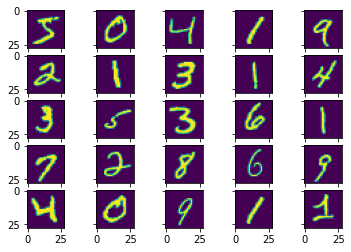

In [91]:
fig,axs=plt.subplots(5,5,sharex=True,sharey=True)
for i in range(5):
    for j in range(5):
        axs[i][j].imshow(train_images[i*5+j])

%reset -f

# Hello world


In [92]:
import tensorflow as tf

# Create a tensor
hello=tf.constant("Hello world")
print(hello)

tf.Tensor(b'Hello world', shape=(), dtype=string)


In [93]:
print(hello.numpy)
%reset -f

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=string, numpy=b'Hello world'>>


# Basic tensor operations

In [94]:
import tensorflow as tf

# define tensor contants
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(5)

# basic tensor operations
print("a+b=", tf.add(a, b).numpy())
print("a-b=", tf.subtract(a, b).numpy())
print("a*b=", tf.multiply(a, b).numpy())
print("b/c=", tf.divide(b, c).numpy())

# group operations
print("mean of [a,b,c]=", tf.reduce_mean([a, b, c]).numpy())
print("sum of [a,b,c]=", tf.reduce_sum([a, b, c]).numpy())
print("max of [a,b,c]=", tf.reduce_max([a, b, c]).numpy())
print("product of [a,b,c]=", tf.reduce_prod([a, b, c]).numpy())

# matrix operation
matrix_a = tf.constant([[1, 2], [3, 4]])
matrix_b = tf.constant([[3, 4], [5, 6]])
matrix_ab=tf.matmul(matrix_a,matrix_b)
print(matrix_ab.numpy())

%reset -f


a+b= 5
a-b= -1
a*b= 6
b/c= 0.6
mean of [a,b,c]= 3
sum of [a,b,c]= 10
max of [a,b,c]= 5
product of [a,b,c]= 30
[[13 16]
 [29 36]]


# Linear Regression Example

step 0 cost 3.085989
step 100 cost 0.176987
step 200 cost 0.171999
step 300 cost 0.168087
step 400 cost 0.165018
step 500 cost 0.162611
step 600 cost 0.160723
step 700 cost 0.159243
step 800 cost 0.158081
step 900 cost 0.157171
step 1000 cost 0.156456
step 1100 cost 0.155896
step 1200 cost 0.155456
step 1300 cost 0.155111
step 1400 cost 0.154841
step 1500 cost 0.154629
step 1600 cost 0.154463
step 1700 cost 0.154332
step 1800 cost 0.154230
step 1900 cost 0.154150
step 2000 cost 0.154087
step 2100 cost 0.154037
step 2200 cost 0.153999
step 2300 cost 0.153968
step 2400 cost 0.153944
step 2500 cost 0.153926
step 2600 cost 0.153911
step 2700 cost 0.153899
step 2800 cost 0.153890
step 2900 cost 0.153883


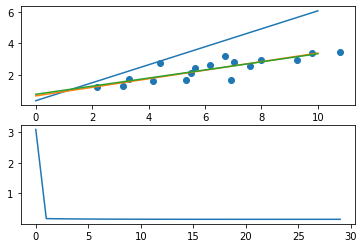

In [95]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Training data
x = np.array([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
              7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
y = np.array([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
              2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])

# Initialize weight and bias
w = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Initialize optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.005)


def linear_regression(x, w, b):  # linear activation
    return w*x+b


def compute_cost(y_hat, y):  # cost function
    return tf.reduce_mean(tf.square(y_hat-y))


def run_optimization(x, y, w, b):
    with tf.GradientTape() as g:
        y_hat = linear_regression(x, w, b)
        cost = compute_cost(y_hat, y)

    gradients = g.gradient(cost, [w, b])
    optimizer.apply_gradients(zip(gradients, [w, b]))


fig, axs = plt.subplots(2, 1,)
axs[0].scatter(x, y)


def plot_predict(w, b, ax):
    x = np.linspace(0, 10)
    ax.plot(x, w*x+b)


costs = []
for step in range(3000):
    run_optimization(x, y, w, b)
    if step % 100 == 0:
        y_hat = linear_regression(x, w, b)
        cost = compute_cost(y_hat, y)
        costs.append(cost)
        print("step %d cost %f" % (step, cost))
    if step % 1000 == 0:
        plot_predict(w, b, axs[0])

axs[1].plot(costs)

%reset -f


## Logistic regression exmaple with mnist dataset

(60000, 784)
(60000, 1)


InvalidArgumentError: cannot compute MatMul as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:MatMul]